In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
cf.go_offline()
%matplotlib inline

In [4]:
global_temp_df= pd.read_csv('GlobalTemperatures.csv')

In [5]:
global_temp_df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [6]:
global_temp_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
len(global_temp_df)

3192

<AxesSubplot:>

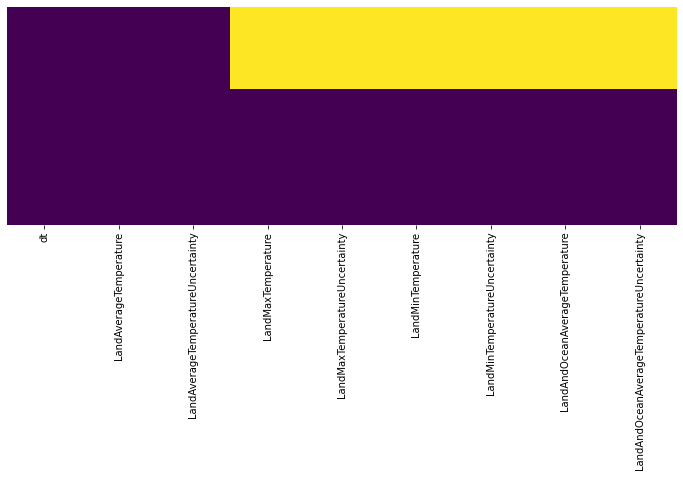

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(global_temp_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [9]:
global_temp_df.dropna(inplace=True)

In [10]:
global_temp_df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

In [11]:
global_temp_df['date']= pd.to_datetime(global_temp_df['dt'])

In [12]:
global_temp_df.drop(columns='dt',axis=1,inplace=True)

In [13]:
global_temp_df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200                   0.749                              1.105   
1201                   3.071                              1.275   
1202                   4.954                              0.955   
1203                   7.217                              0.665   
1204                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty       date  
1200                                      0.367 1850-01-01  
1201                                      0.414 1850-02-01  
1202                                      0.341 1850-03-01  
1203                                      0.267 1850-04-01  
1204                                      0.249 1850-05-01

In [14]:
global_temp_df['year']= global_temp_df['date'].apply(lambda x : x.year)

In [15]:
global_temp_df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200                   0.749                              1.105   
1201                   3.071                              1.275   
1202                   4.954                              0.955   
1203                   7.217                              0.665   
1204                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty       date  year  
1200                                      0.367 1850-01-01  1850  
1201                                      0.414 1850-02-01  1850  
1202                                      0.341 1850-03-01  1850  
1203                                      0.267 1850-04-01  1850  
1204                                      0.249 1850-05-01  1850

In [16]:
global_temp_df.drop(columns='date',axis=1,inplace=True)

In [18]:
global_temp_mean_by_year_df =global_temp_df.groupby(by='year').mean()

In [19]:
global_temp_mean_by_year_df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
year                                                              
1850                7.900667                           0.876417   
1851                8.178583                           0.881917   
1852                8.100167                           0.918250   
1853                8.041833                           0.835000   
1854                8.210500                           0.825667   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
year                                                                          
1850           13.476667                       2.394833            1.964333   
1851           13.081000                       2.397250            2.203917   
1852           13.397333                       2.619250            2.337000   
1853           13.886583                       2.095083            1.892500   
1854           13.977417                       1.783333            1.762167   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
year                                                                  
1850                       1.571167                       14.867167   
1851                       1.632417                       14.991833   
1852                       1.382917                       15.006500   
1853                       1.355583                       14.955167   
1854                       1.357000                       14.991000   

      LandAndOceanAverageTemperatureUncertainty  
year                                             
1850                                   0.308167  
1851                                   0.312083  
1852                                   0.316417  
1853                                   0.283833  
1854                                   0.276417

In [20]:
df = pd.read_csv('GlobalTemperatures.csv')

In [21]:
df['date']= pd.to_datetime(df['dt'])

In [22]:
df['year']= df['date'].apply(lambda x : x.year)

In [23]:
df.drop(columns=['LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','dt','date'],axis=1,inplace=True)

In [24]:
data= df.groupby(by='year').mean()

In [25]:
data.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
year                                                              
1750                8.719364                           2.637818   
1751                7.976143                           2.781143   
1752                5.779833                           2.977000   
1753                8.388083                           3.176000   
1754                8.469333                           3.494250   

      LandMaxTemperature  LandMaxTemperatureUncertainty  
year                                                     
1750                 NaN                            NaN  
1751                 NaN                            NaN  
1752                 NaN                            NaN  
1753                 NaN                            NaN  
1754                 NaN                            NaN

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['LandAverageTemperature'],
                    mode='lines',
                    name='LandAvgTemp'))
fig.add_trace(go.Scatter(x=data.index, y=data['LandAverageTemperatureUncertainty'],
                    mode='lines',
                    name='LandAvgTempError'))
fig.update_layout(title='Average Land Temperature between 1750:2015',title_font_size = 20,font =dict(size = 12,color = '#7f7f7f'),template = 'ggplot2',hovermode ='closest')

fig.show()

In [28]:
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Scatter(x=global_temp_mean_by_year_df.index, y=global_temp_mean_by_year_df['LandAverageTemperature'],
                    mode='lines',
                    name='LandAvgTemp'),row=1,col=1)
fig.add_trace(go.Scatter(x=global_temp_mean_by_year_df.index, y=global_temp_mean_by_year_df['LandMaxTemperature'],
                    mode='lines',
                    name='LandMaxTemp'),row=1,col=2)
fig.add_trace(go.Scatter(x=global_temp_mean_by_year_df.index, y=global_temp_mean_by_year_df['LandMinTemperature'],
                    mode='lines',
                    name='LandMinTemp'),row=2,col=1)
fig.add_trace(go.Scatter(x=global_temp_mean_by_year_df.index, y=global_temp_mean_by_year_df['LandAndOceanAverageTemperature'],
                    mode='lines',
                    name='LandOceanAvgTemp'),row=2,col=2)
fig.update_layout(title='Temperature trend between 1850:2015',title_font_size = 20,font =dict(size = 12,color = '#7f7f7f'),template = 'ggplot2',hovermode ='closest')

fig.show()

In [29]:
global_temp_mean_by_year_df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
year                                                              
1850                7.900667                           0.876417   
1851                8.178583                           0.881917   
1852                8.100167                           0.918250   
1853                8.041833                           0.835000   
1854                8.210500                           0.825667   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
year                                                                          
1850           13.476667                       2.394833            1.964333   
1851           13.081000                       2.397250            2.203917   
1852           13.397333                       2.619250            2.337000   
1853           13.886583                       2.095083            1.892500   
1854           13.977417                       1.783333            1.762167   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
year                                                                  
1850                       1.571167                       14.867167   
1851                       1.632417                       14.991833   
1852                       1.382917                       15.006500   
1853                       1.355583                       14.955167   
1854                       1.357000                       14.991000   

      LandAndOceanAverageTemperatureUncertainty  
year                                             
1850                                   0.308167  
1851                                   0.312083  
1852                                   0.316417  
1853                                   0.283833  
1854                                   0.276417

In [31]:
global_temp_mean_by_year_df['TurningPoint']=np.where(global_temp_mean_by_year_df.index<=1975,'before','after')

In [32]:
fig = make_subplots(rows = 2,cols = 2)
fig.update_layout(title = 'Average Temperature before and after 1975',
                 font = dict(size = 12,color ='#7f7f7f'),
                 template = 'ggplot2',title_font_size = 20,hovermode = 'closest')
fig.add_trace(go.Box(x = global_temp_mean_by_year_df['LandAverageTemperature'],
                    y = global_temp_mean_by_year_df['TurningPoint'],boxpoints = 'all',jitter = 0.3,
                pointpos  =-1.6,boxmean = True,name = 'Land Avg Temperature'),
             row  =1,col = 1)

fig.add_trace(go.Box(x = global_temp_mean_by_year_df['LandMinTemperature'],
                    y = global_temp_mean_by_year_df['TurningPoint'],boxpoints = 'all',jitter = 0.3,
                pointpos  =-1.6,boxmean = True,name = 'Land Min Temperature'),
             row  =1,col = 2)

fig.add_trace(go.Box(x = global_temp_mean_by_year_df['LandMaxTemperature'],
                    y = global_temp_mean_by_year_df['TurningPoint'],boxpoints = 'all',jitter = 0.3,
                pointpos  =-1.6,boxmean = True,name = 'Land Max Temperature'),
             row  =2,col = 1)

fig.add_trace(go.Box(x = global_temp_mean_by_year_df['LandAndOceanAverageTemperature'],
                    y = global_temp_mean_by_year_df['TurningPoint'],boxpoints = 'all',jitter = 0.3,
                pointpos  =-1.6,boxmean = True,name = 'Land&Ocean Avg Temperature'),
             row  =2,col = 2)

fig.update_traces(orientation = 'h')


In [33]:
countries_df=pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [78]:
countries_df.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [80]:
len(countries_df)

8599212

In [79]:
countries_df['date']= pd.to_datetime(countries_df['dt'])
countries_df['year']= countries_df['date'].apply(lambda x : x.year)

In [81]:
countries_df.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude       date  year  
0  Denmark   57.05N    10.33E 1743-11-01  1743  
1  Denmark   57.05N    10.33E 1743-12-01  1743  
2  Denmark   57.05N    10.33E 1744-01-01  1744  
3  Denmark   57.05N    10.33E 1744-02-01  1744  
4  Denmark   57.05N    10.33E 1744-03-01  1744

In [83]:
by_year = countries_df.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

In [84]:
by_year.head()

year             City         Country Latitude Longitude  \
0  1743         A Coruña           Spain   42.59N     8.73W   
1  1743           Aachen         Germany   50.63N     6.34E   
2  1743          Aalborg         Denmark   57.05N    10.33E   
3  1743         Aberdeen  United Kingdom   57.05N     1.48W   
4  1743  Aix En Provence          France   44.20N     4.47E   

   AverageTemperature  AverageTemperatureUncertainty  
0              10.779                          1.942  
1               6.425                          1.628  
2               6.068                          1.737  
3               8.758                          1.886  
4               7.478                          1.866

In [93]:
continent_df= pd.read_csv('continents2.csv')

In [94]:
continent_df.head()

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [95]:
continent_df['Country']= continent_df['name']

In [96]:
continent_df= continent_df[['Country','alpha-2','alpha-3','region']]

In [97]:
continent_df.head()

Country alpha-2 alpha-3   region
0     Afghanistan      AF     AFG     Asia
1   Åland Islands      AX     ALA   Europe
2         Albania      AL     ALB   Europe
3         Algeria      DZ     DZA   Africa
4  American Samoa      AS     ASM  Oceania

In [98]:
data_df = pd.merge(left = by_year, right = continent_df, on = 'Country', how = 'left')

In [100]:
data_df.head()

year             City         Country Latitude Longitude  \
0  1743         A Coruña           Spain   42.59N     8.73W   
1  1743           Aachen         Germany   50.63N     6.34E   
2  1743          Aalborg         Denmark   57.05N    10.33E   
3  1743         Aberdeen  United Kingdom   57.05N     1.48W   
4  1743  Aix En Provence          France   44.20N     4.47E   

   AverageTemperature  AverageTemperatureUncertainty alpha-2 alpha-3  region  
0              10.779                          1.942      ES     ESP  Europe  
1               6.425                          1.628      DE     DEU  Europe  
2               6.068                          1.737      DK     DNK  Europe  
3               8.758                          1.886      GB     GBR  Europe  
4               7.478                          1.866      FR     FRA  Europe

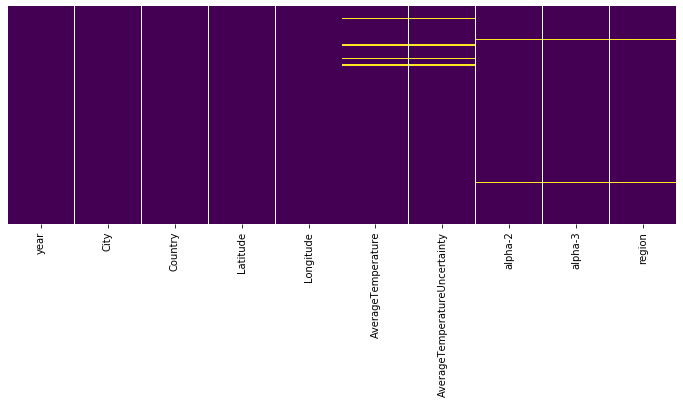

In [101]:
plt.figure(figsize=(12,4))
sns.heatmap(data_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [102]:
data_df = data_df[data_df['year'] >= 1825]

In [104]:
region = data_df.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data_df.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data_df.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

In [105]:
region.head()

region  year  AverageTemperature  AverageTemperatureUncertainty
0  Africa  1825           19.101298                       2.128159
1  Africa  1826           18.988367                       2.195267
2  Africa  1827           19.370136                       2.201663
3  Africa  1828           19.290521                       2.250654
4  Africa  1829           18.878992                       2.404870

In [106]:
countries.head()

region  Country  year  AverageTemperature  AverageTemperatureUncertainty
0  Africa  Algeria  1825           17.642750                       2.168750
1  Africa  Algeria  1826           17.461233                       2.140183
2  Africa  Algeria  1827           17.456433                       2.193283
3  Africa  Algeria  1828           17.902917                       2.200283
4  Africa  Algeria  1829           17.311133                       2.390317

In [107]:
cities.head()

region  Country     City  year Latitude Longitude  AverageTemperature  \
0  Africa  Algeria  Algiers  1825   36.17N     3.98E           16.331917   
1  Africa  Algeria  Algiers  1826   36.17N     3.98E           16.113000   
2  Africa  Algeria  Algiers  1827   36.17N     3.98E           16.107500   
3  Africa  Algeria  Algiers  1828   36.17N     3.98E           16.617917   
4  Africa  Algeria  Algiers  1829   36.17N     3.98E           15.917000   

   AverageTemperatureUncertainty  
0                       2.172583  
1                       2.135083  
2                       2.179500  
3                       2.198583  
4                       2.396667

In [110]:
region[region['region']=='Oceania']

region  year  AverageTemperature  AverageTemperatureUncertainty
756  Oceania  1841           14.390653                       2.024590
757  Oceania  1842           14.389847                       1.741667
758  Oceania  1843           14.699431                       1.683479
759  Oceania  1844           14.034250                       1.703583
760  Oceania  1845           14.468812                       1.768521
..       ...   ...                 ...                            ...
924  Oceania  2009           16.453087                       0.296382
925  Oceania  2010           16.612063                       0.282163
926  Oceania  2011           16.403090                       0.272479
927  Oceania  2012           16.162031                       0.358740
928  Oceania  2013           16.657682                       0.401964

[173 rows x 4 columns]

In [111]:
fig = px.line(region, x="year", y="AverageTemperature", color='region',title='Average Temperature for continents ')
fig.show()

In [112]:
mean_temp= region.groupby(by='region').mean()

In [157]:
mean_temp.head()

year  AverageTemperature  AverageTemperatureUncertainty
region                                                           
Africa    1919           22.346641                       0.939292
Americas  1919           18.445669                       0.887485
Asia      1919           19.424358                       0.847739
Europe    1919            8.225892                       0.768513
Oceania   1927           15.497482                       0.690294

In [116]:
max_temp= region.groupby(by='region').max()

In [117]:
max_temp.head()

year  AverageTemperature  AverageTemperatureUncertainty
region                                                           
Africa    2013           24.623246                       2.878872
Americas  2013           19.841358                       3.014594
Asia      2013           21.506718                       2.517354
Europe    2013            9.915804                       3.211622
Oceania   2013           16.754167                       2.082571

In [123]:
fig = go.Figure(data=[
    go.Bar(name='Mean Temp', x=mean_temp.index, y=mean_temp['AverageTemperature'],marker_color='indianred'),
    go.Bar(name='Max Temp', x=max_temp.index, y=max_temp['AverageTemperature'],marker_color='lightsalmon')
])
# Change the bar mode
fig.update_layout(barmode='group',title='Mean and Maximum Temperature')
fig.show()

In [124]:
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])

In [125]:
difference.head()

Country    region  AverageTemperature_x  AverageTemperature_y
0  Afghanistan      Asia             13.781737             15.999219
1      Albania    Europe             15.576347             17.413625
2      Algeria    Africa             17.823883             19.461067
3       Angola    Africa             21.771977             24.481400
4    Argentina  Americas             17.226230             20.574806

In [128]:
difference['diff']= difference['AverageTemperature_y']-difference['AverageTemperature_x']

In [129]:
difference.head()

Country    region  AverageTemperature_x  AverageTemperature_y      diff
0  Afghanistan      Asia             13.781737             15.999219  2.217482
1      Albania    Europe             15.576347             17.413625  1.837278
2      Algeria    Africa             17.823883             19.461067  1.637184
3       Angola    Africa             21.771977             24.481400  2.709423
4    Argentina  Americas             17.226230             20.574806  3.348576

In [147]:
fig = go.Figure()
fig.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template='ggplot2',height = 3500, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

In [150]:
map_countries = data_df.dropna(axis = 0).groupby(by = ['region','Country',
                                                   'year','alpha-3']).mean().reset_index()
map_countries.head()

region  Country  year alpha-3  AverageTemperature  \
0  Africa  Algeria  1825     DZA           17.642750   
1  Africa  Algeria  1826     DZA           17.461233   
2  Africa  Algeria  1827     DZA           17.456433   
3  Africa  Algeria  1828     DZA           17.902917   
4  Africa  Algeria  1829     DZA           17.311133   

   AverageTemperatureUncertainty  
0                       2.168750  
1                       2.140183  
2                       2.193283  
3                       2.200283  
4                       2.390317

In [152]:
map_countries['AverageTemperature'].min()

-5.453083333333335

In [153]:
map_countries['AverageTemperature']=map_countries['AverageTemperature']+6

In [155]:
fig = px.scatter_geo(map_countries, locations="alpha-3",
                     color="region", # which column to use to set the color of markers
                     hover_name="Country", # column added to hover information
                     size="AverageTemperature", # size of markers
                     animation_frame = 'year',projection="natural earth")
fig.show()

In [176]:
mean1 = map_countries.groupby(by=['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()

In [177]:
max1=map_countries.groupby(by=['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()

In [178]:
difference_temp= pd.merge(left=mean1,right=max1,on=['region','Country','alpha-3'])

In [180]:
difference_temp['diff']=difference_temp['AverageTemperature_y'] - difference_temp['AverageTemperature_x']

In [185]:
difference_temp.rename(columns  ={'AverageTemperature_y':"Maximum Average Temperature",
                            'AverageTemperature_x':"Overall Avg Temp"},inplace=True)

In [187]:
fig = px.scatter_geo(difference_temp, locations="alpha-3",
                     color="Overall Avg Temp", # which column to use to set the color of markers
                     hover_name="Country", # column added to hover information
                     size="diff", # size of markers
                     projection="natural earth")
fig.show()

# Inferences
The global temperature has been rising continuously over the years.

1975 can be considered as a crucial time in history after which there was no going back as the temperatures saw a significant increase in temperature (aboute 0.8 increase in avg land temperature)

Although all the Continents have seen the upward trend in temperature , Africa and Asia are most affected.

Europe is the coolest among all the continents.